In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("data\insurance.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\SAMANWAYA\AppData\Local\Temp\ipykernel_22372\3432869695.py:1: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv("data\insurance.csv")


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.shape

(1338, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,1338.0,668.500000,386.391641,0.0000,334.25000,668.500,1002.750000,1337.00000
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [15]:
df.head(2)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.9240
1,1,18,male,33.77,1,no,southeast,1725.5523


# Univariate Analysis

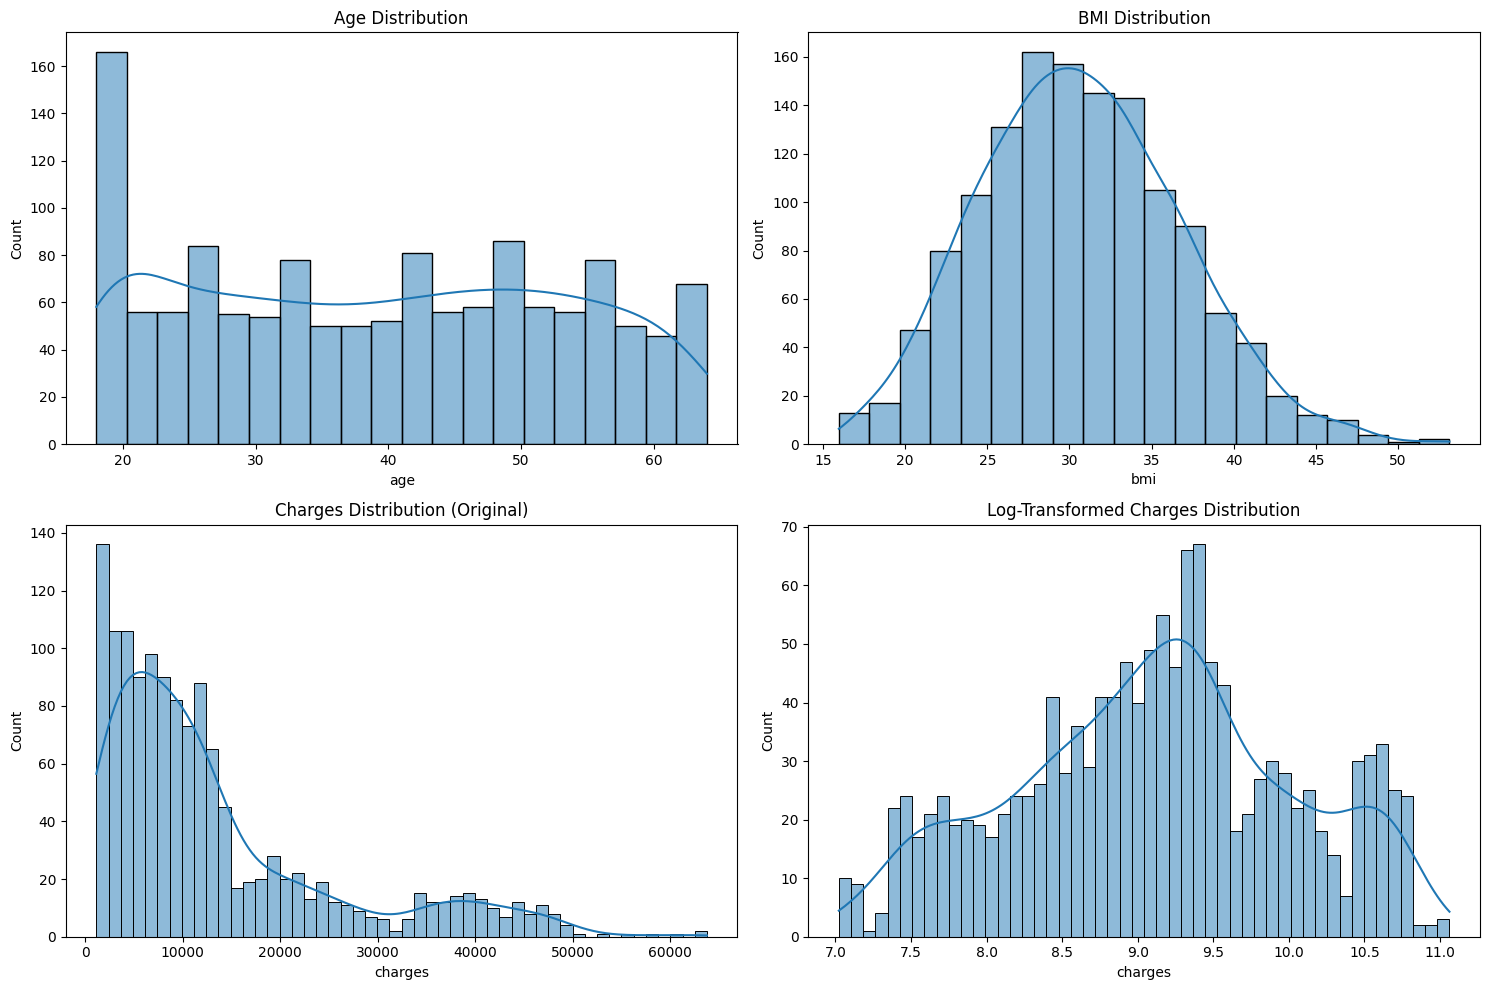

In [31]:
plt.figure(figsize=(15, 10))

# Numerical Variables Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Charges Distribution (Original)')

plt.subplot(2, 2, 4)
sns.histplot(np.log(df['charges']), bins=50, kde=True)
plt.title('Log-Transformed Charges Distribution')
plt.tight_layout()
plt.show()


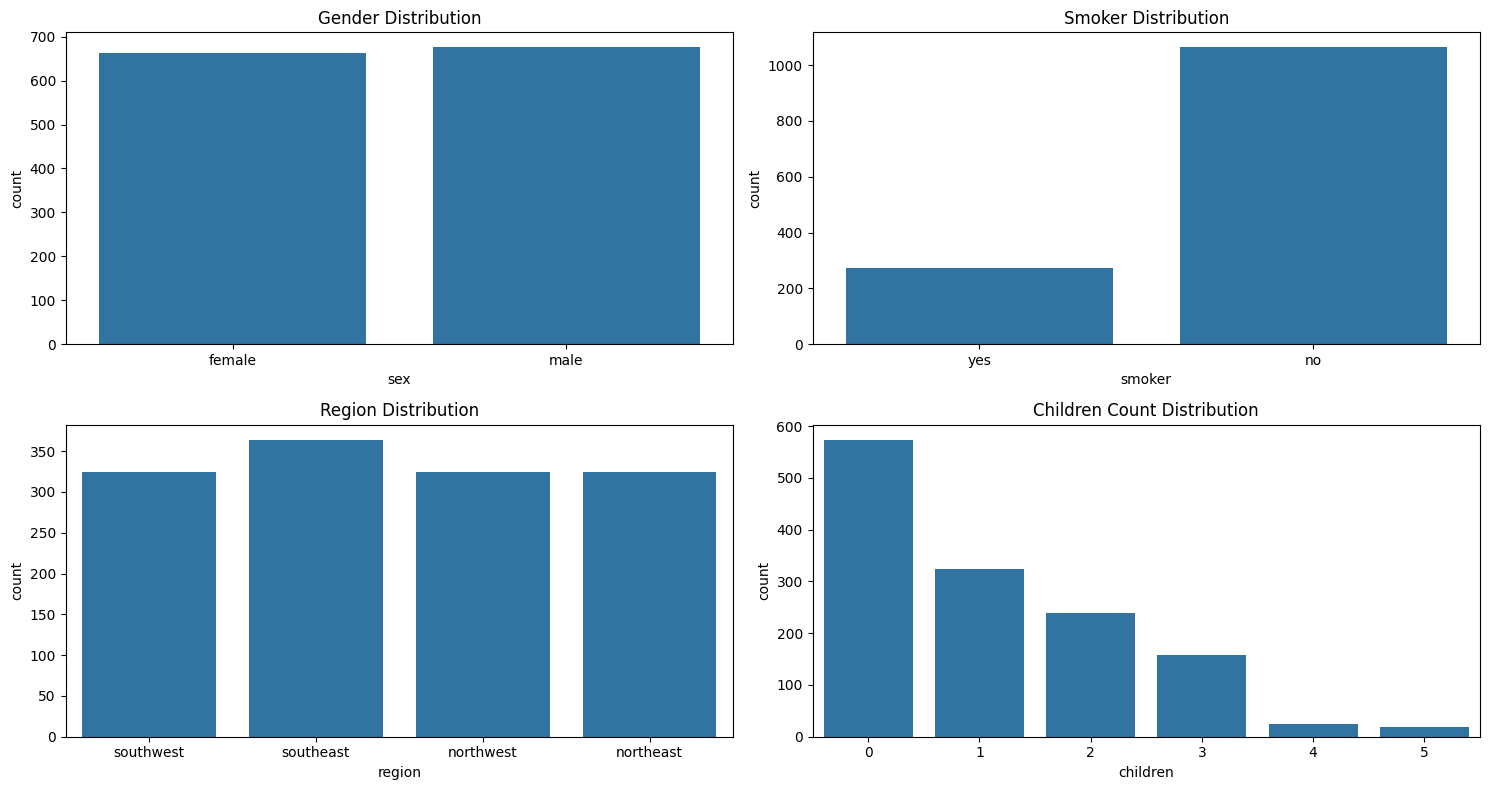

In [37]:
# Categorical Variables Distribution
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='region', data=df)
plt.title('Region Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='children', data=df)
plt.title('Children Count Distribution')
plt.tight_layout()
plt.show()


# Bivariate Analysis

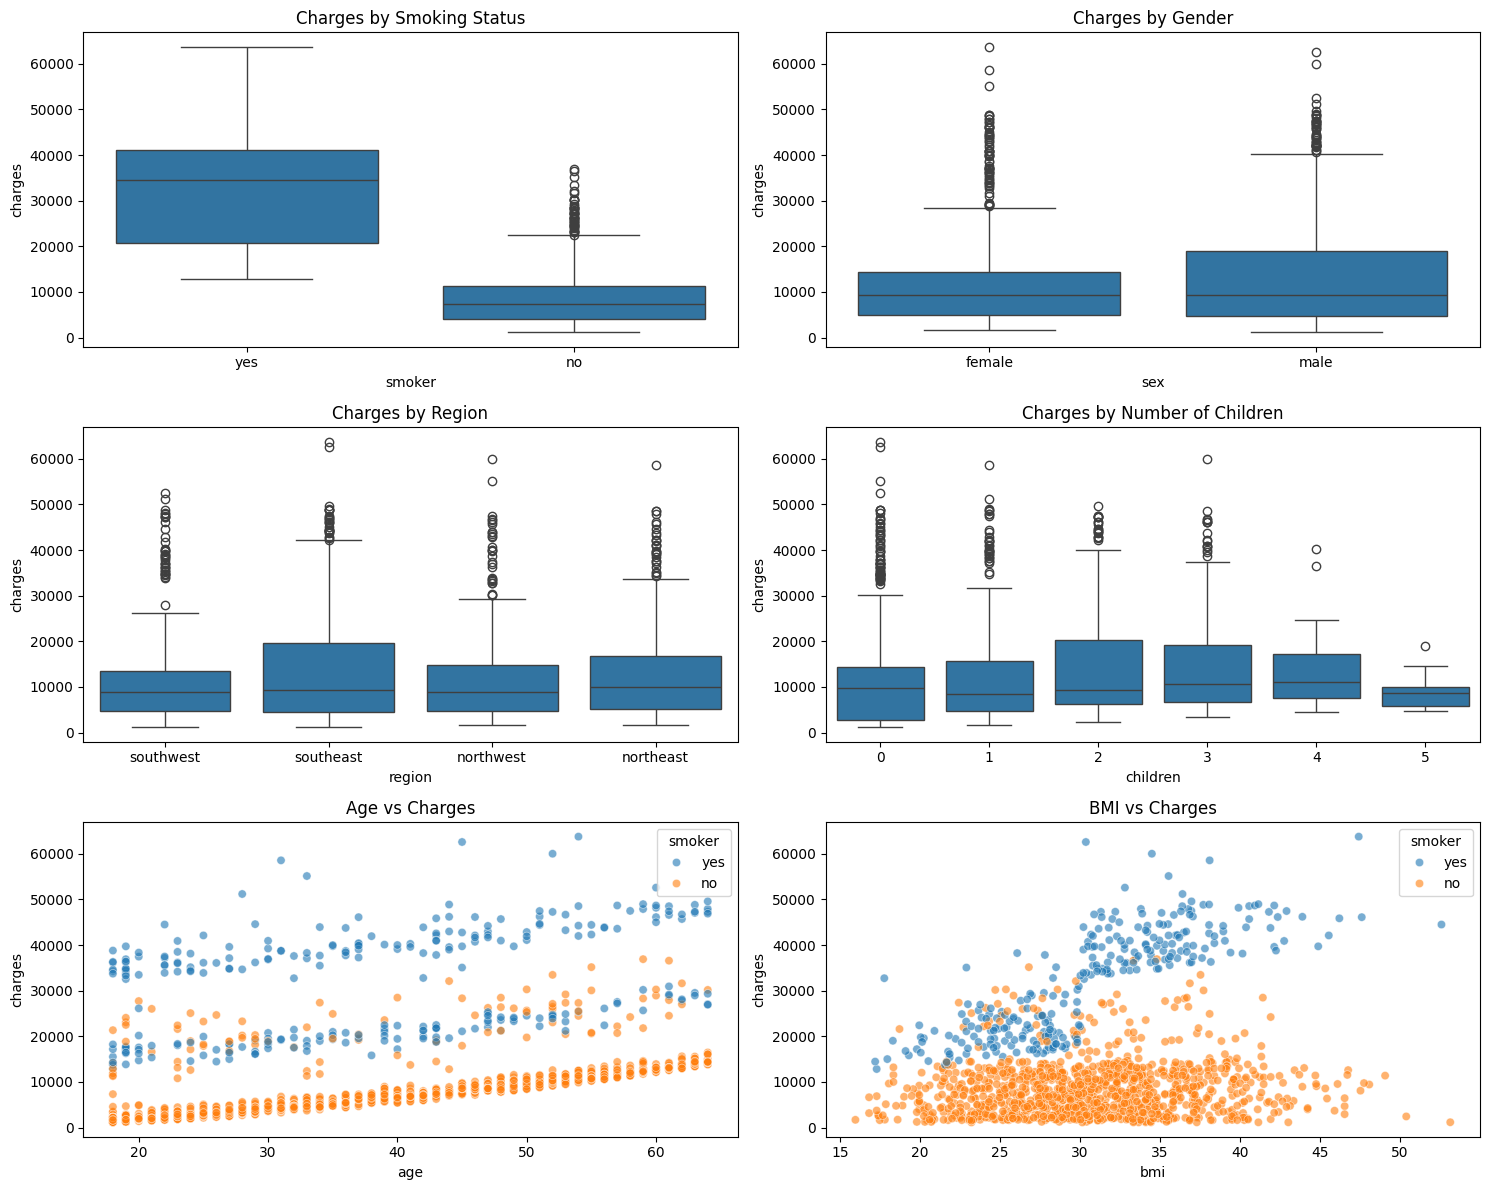

In [38]:
plt.figure(figsize=(15, 12))

# Charges vs. Smoking Status
plt.subplot(3, 2, 1)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')

# Charges vs. Gender
plt.subplot(3, 2, 2)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Gender')

# Charges vs. Region
plt.subplot(3, 2, 3)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')

# Charges vs. Children
plt.subplot(3, 2, 4)
sns.boxplot(x='children', y='charges', data=df)
plt.title('Charges by Number of Children')

# Age vs. Charges
plt.subplot(3, 2, 5)
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', alpha=0.6)
plt.title('Age vs Charges')

# BMI vs. Charges
plt.subplot(3, 2, 6)
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', alpha=0.6)
plt.title('BMI vs Charges')
plt.tight_layout()
plt.show()

# Multivariate Analysis

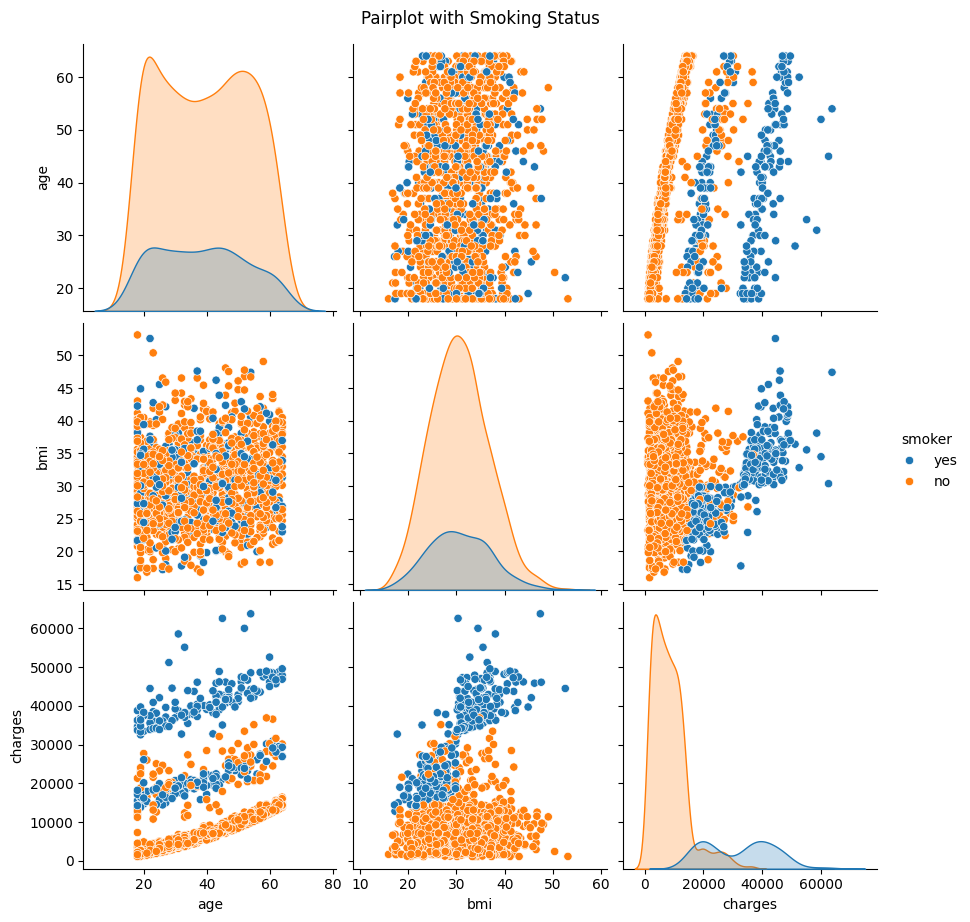

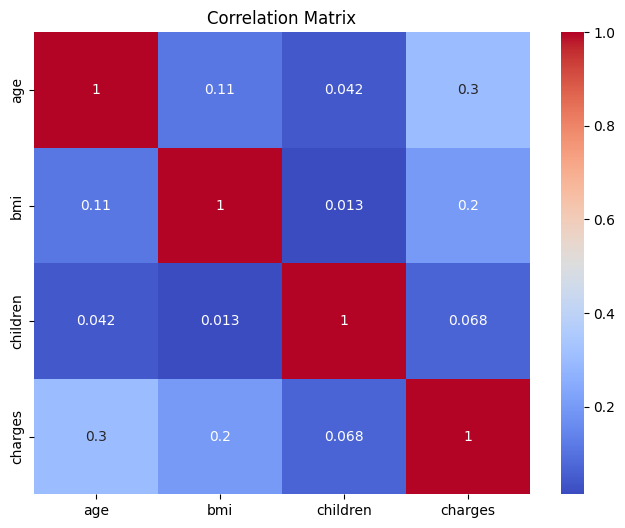

In [39]:
sns.pairplot(df[['age', 'bmi', 'charges', 'smoker']], hue='smoker', height=3)
plt.suptitle('Pairplot with Smoking Status', y=1.02)
plt.show()

# Correlation Heatmap
corr_matrix = df[['age', 'bmi', 'children', 'charges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Statistical Insights


Smoker charges mean: $ 32050.23
Non-smoker charges mean: $ 8434.27


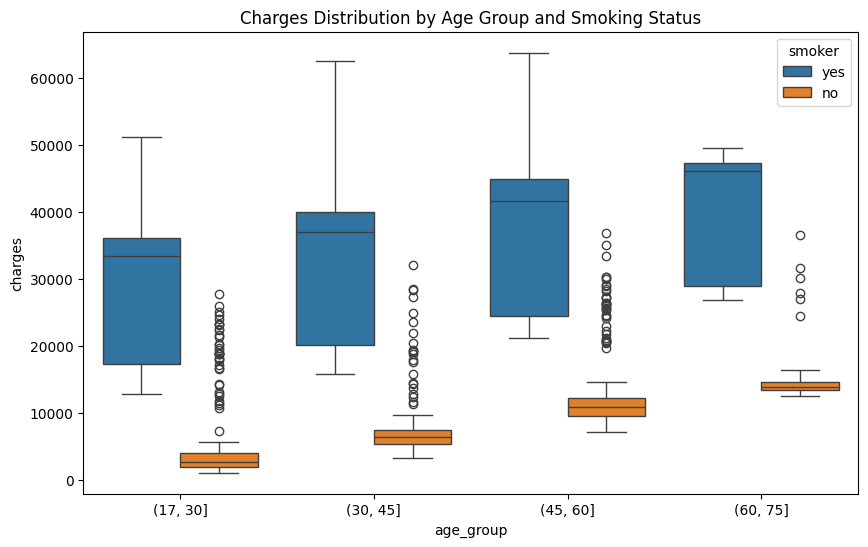

In [40]:
# Smoker vs Non-Smoker Charges Comparison
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']
print("\nSmoker charges mean: $", round(smoker_charges.mean(), 2))
print("Non-smoker charges mean: $", round(non_smoker_charges.mean(), 2))

# Age Groups Analysis
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 45, 60, 75])
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='charges', hue='smoker', data=df)
plt.title('Charges Distribution by Age Group and Smoking Status')
plt.show()


# Outlier Detection

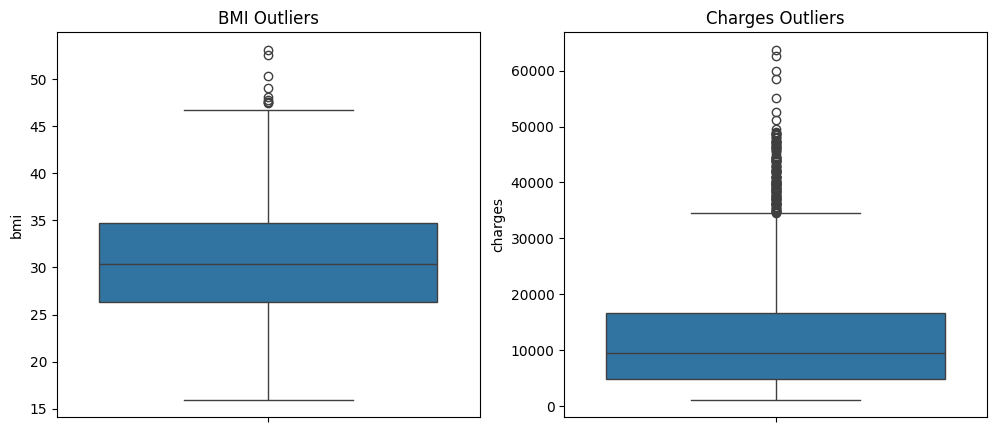

In [41]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='bmi', data=df)
plt.title('BMI Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y='charges', data=df)
plt.title('Charges Outliers')
plt.show()